# Employee Attrition Analysis and Prediction

This project aims to provide insights into the factors influencing employee attrition 
and predict which employees are likely to leave the company.

### Dataset:

* Acme Corporation
has provided historical data on employee demographics, job satisfaction, work environment,
performance metrics, and turnover status. This dataset spans the last five years and includes information on
employees who have left the company and those who are still currently employed.The dataset typically includes
several features that provide insights into employee characteristics, job satisfaction, and performance.

### Need of Employee Attrition prediction
* Managing workforce 
* Helpful for hiring Management

#### Steps to follow inorder to clean dataset and check accuracy:
    1. Import Necessary Libraries
    2. Import DATASET of Acme Corporation for Employee attrition analysis
    3. Understanding Data and CLeaning
    4. Checking if Data is balanced or not
    5. Saving Data in csv format for generating insights using Tableau

# 1. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Import Dataset 

In [3]:
data = pd.read_csv(r'C:\Users\91936\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3. Understanding Data and CLeaning

#### info() prints information about the DataFrame.
The information contains:
    the number of columns, 
    column labels, 
    column data types, 
    memory usage,
    range index, 
    and the number of cells in each column (non-null values).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# There are object datatypes aswell. To handle that will use label Encoding
#Attrition is out target value and its it categorical format

#### .describe() method in Pandas is a convenient way to get a quick overview of our data.  (it provides Descriptive Stats)
By default, it provides the count, mean, standard deviation, minimum,
25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), 
and maximum of the columns.

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check Duplicates

In [13]:
print('Shape of Data',data.shape)
data.duplicated().value_counts()

Shape of Data (1470, 35)


False    1470
dtype: int64

### Checking Missing Values

In [14]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Checking if Data is balanced or not
### Target variable (Attrition) 

<AxesSubplot:xlabel='count', ylabel='Attrition'>

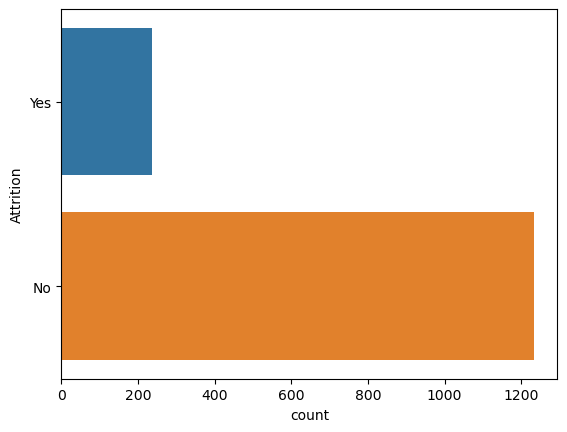

In [15]:
sns.countplot(y='Attrition', data= data)

### Gender 

In [17]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [20]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

# data is highly imbalanced
##### to handle imbalanced data we can use : 
1. Resampling (Oversampling and Undersampling) 
2.  Synthetic Minority Oversampling Technique or SMOTE, which is another technique to oversample the minority class

In [ ]:
# Here I am keeping it simple inorder to analyse data and generate insights from it.

# 5. Saving Data in csv format for generating insights using Tableau

In [22]:
# there was no cleaning required and no missing values
# so there is not need to save data file again
# crosschecked data consistency and accuracy


### ------------- Generating Insights Using Tableau now---------------------
### using Calculated Fields, Filters and Table Calculations i will handle categorical data and rest

### -----------------------------------------END---------------------------------------